Spam filtering


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("spam.csv", encoding='latin-1')


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4352,ham,Fun fact: although you would think armand woul...,NaN,NaN,NaN
4328,ham,1Apple/Day=No Doctor. 1Tulsi Leaf/Day=No Cance...,NaN,NaN,NaN
1993,ham,Eh den sat u book e kb liao huh...,NaN,NaN,NaN
5541,ham,Yeah it's jus rite...,NaN,NaN,NaN
4666,ham,I send the print outs da.,NaN,NaN,NaN


Data cleaning

In [5]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3' ,'Unnamed: 4'])

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3' ,'Unnamed: 4'])

In [8]:
#rename cols
df.rename(columns={'v1':'target', 'v2': 'text'}, inplace=True)

In [9]:
df.sample(5)

,target,text
2745,ham,R Ì_ going 4 today's meeting?
222,ham,"Sorry, I'll call later"
1719,ham,Then u better go sleep.. Dun disturb u liao.. ...
3094,ham,Olol i printed out a forum post by a guy with ...
5319,ham,Kothi print out marandratha.


In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['target']=encoder.fit_transform(df['target'])

In [11]:
df.sample(5)

,target,text
4064,0,Dont kick coco when he's down
2678,0,Was playng 9 doors game and gt racing on phone...
1000,0,No..but heard abt tat..
25,0,Just forced myself to eat a slice. I'm really ...
2555,1,FreeMSG You have been awarded a FREE mini DIGI...


In [12]:
#missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#duplicates
df.duplicated().sum()

403

In [14]:
df.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
df.duplicated().sum()

403

EDA

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

In [18]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x2792ae91b20>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41')])

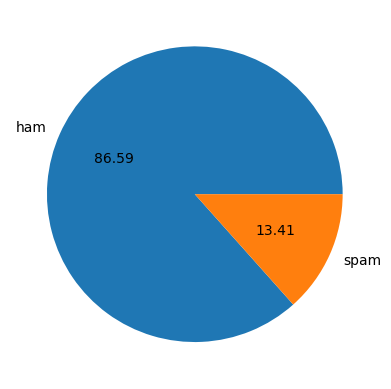

In [19]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")

In [20]:
#data is imbalanced

Make use of nltk to analyse the words/characters

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
#count characters
df['num_chars']=df['text'].apply(len)


In [24]:
#fetch number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
#number of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


The above code makes use of the nltk tool to fetch sentences,characters and words .

In [27]:
df[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.695621,1.970747
std,59.690841,13.742587,1.417778
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,28.000000


Analyze ham--not spam emails
and spam seperately

In [28]:
#ham msgs
df[df['target'] == 0][['num_chars','num_words','num_sentences']].describe()


,num_chars,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.271917,1.808705
std,58.016023,13.988885,1.328227
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
#spam msgs
df[df['target'] == 1][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.017403
std,29.183082,6.867007,1.528449
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [30]:
import matplotlib as plt
import seaborn as sns

<AxesSubplot:xlabel='num_chars', ylabel='Count'>

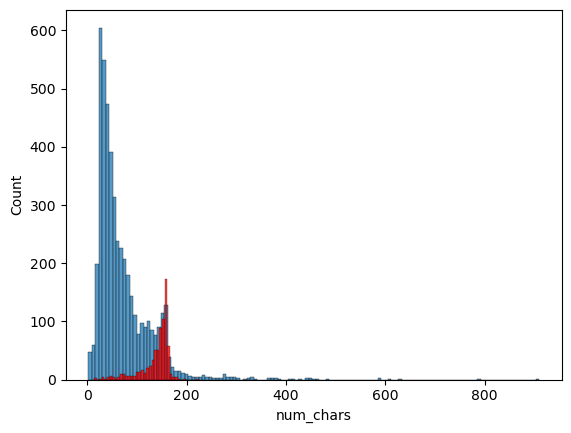

In [31]:
sns.histplot(df[df['target'] ==0]['num_chars'])##ham
sns.histplot(df[df['target'] ==1]['num_chars'],color='red')##spam

Conclusion

spam==made up of less characters
 
ham== made up of more characters


<AxesSubplot:xlabel='num_words', ylabel='Count'>

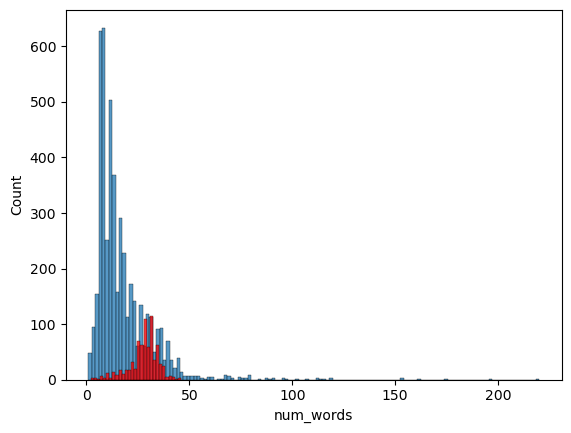

In [32]:
sns.histplot(df[df['target'] ==0]['num_words'])##ham
sns.histplot(df[df['target'] ==1]['num_words'],color='red')##spam

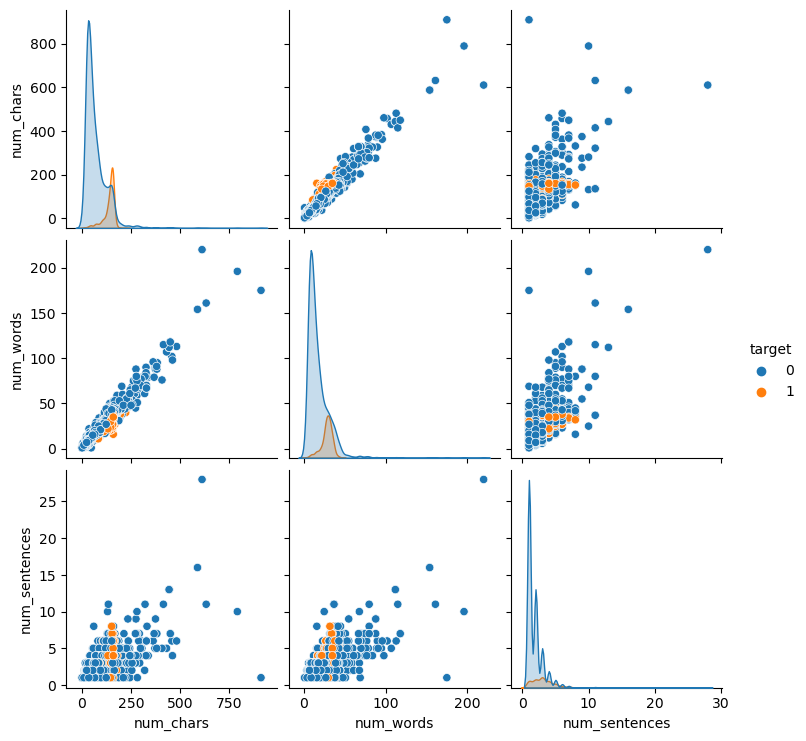

In [33]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

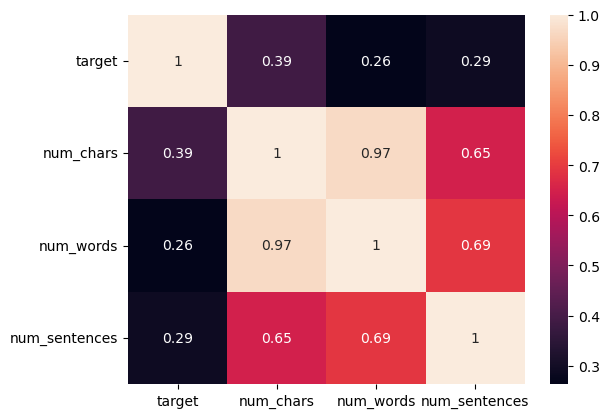

In [34]:
sns.heatmap(df.corr(),annot=True)

choose that column in which the correlation is high and closer to 1 wrt to target
and build the model along that column 

,here the num_char colun will be used

Data Preprocessing:

lower case

tokenization

removing the special chars

removing stop words and punctuation

stemming

In [35]:
from nltk.corpus import stopwords


In [36]:
import string 


In [37]:
#stemming
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

In [38]:
#function to transform text to lower caseimport nltk
from nltk.corpus import stopwords
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
     
    y = []

    for i in text:
        if i.isalnum() and  i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:

     y.append(ps.stem(i))
    return " ".join(y)



In [39]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')



'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [40]:
df['transformed_text']=df['text'].apply(transform_text)

In [41]:
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Generate the word cloud

In [42]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [43]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

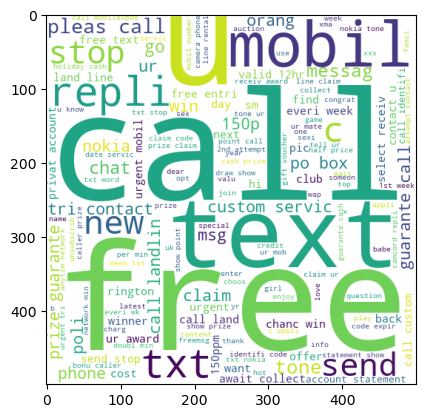

In [44]:
import matplotlib.pyplot as plt
plt.imshow(spam_wc)

In [45]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

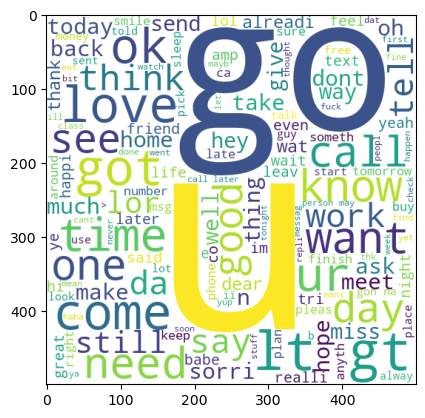

In [46]:
plt.imshow(ham_wc)

In [47]:
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
   for word in msg.split():
     spam_corpus.append(word)

In [52]:
len(spam_corpus)

11490

In [ ]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30) )
 